# Time Series Analysis with Python 

Based somewhat on the tutorial from SciPy 2016 by Aileen Nielsen

https://www.youtube.com/watch?v=JNfxr4BQrLk&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6&index=3

## Contents

- Setup: Generate a Random Time-Series
- Create a Datetime Index
- Create DataFrame
- Basic Descriptive Statistics
- Time-Series Plot
- Create a Rolling Average
- Frequency Plot (Histogram)
- Add a Calculated Column
- Scatter Plot
- Save a Plot as an Image File
- Correllation matrix
- Create a Cumulative Function
- Plots with Secondary Axes
- Add a Categoy Column
- Calculating Average/Sum/Count by category (groupby)
- Frequency Plot (Histogram) - with control of bins
- Drop Missing Values
- Linear Regression
- Applying a Custom Function


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Setup: Generate Random Data

Summary of different probility distributions here: 
- http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

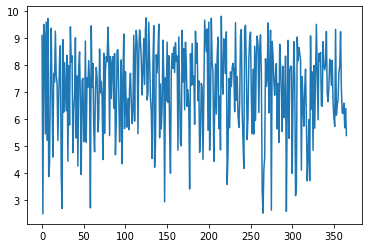

In [37]:
n = 366

# Normal distribution
#x = np.random.randn(n)

# Chi-square distribution
#x = np.random.chisquare(2, size=n)

# Beta distribution
x = 10.0*(1 - np.random.beta(2, 5, size=n))

plt.plot(x)
plt.show()

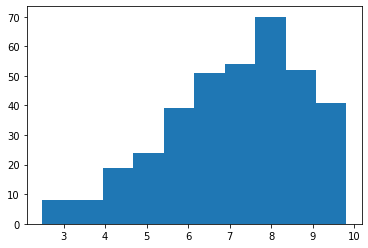

In [38]:
plt.hist(x)
plt.show()

In [39]:
# Now throw in some missing values!
for i in range(15):
    x[np.random.choice(366)] = np.nan

### Create a Datetime Index

In [40]:
time_series = pd.date_range("2016-01-01", "2016-12-31")
time_series.name='Date'
time_series

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq='D')

### Create DataFrame

In [41]:
df = pd.DataFrame(data=x, index=time_series, columns=['X'])
df.head()

,X
Date,
2016-01-01,9.103938
2016-01-02,2.481612
2016-01-03,9.510878
2016-01-04,9.152343
2016-01-05,5.447742


### Basic Descriptive Statistics

In [42]:
df.describe()

,X
count,351.000000
mean,7.129420
std,1.651777
min,2.481612
25%,6.044766
50%,7.389479
75%,8.348755
max,9.811717


### Time-Series Plot

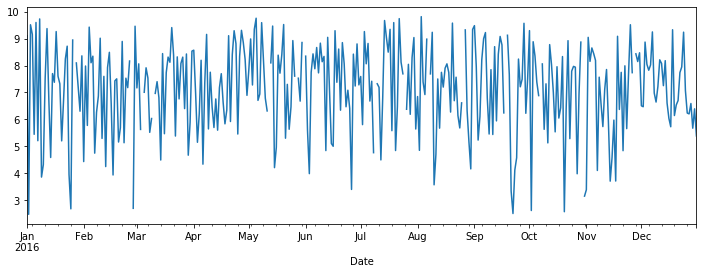

In [43]:
df.X.plot(figsize=(12,4))
plt.show()

### Create a Rolling Average

In [44]:
df['7-day Moving Average'] = df.X.rolling(window=7).mean()

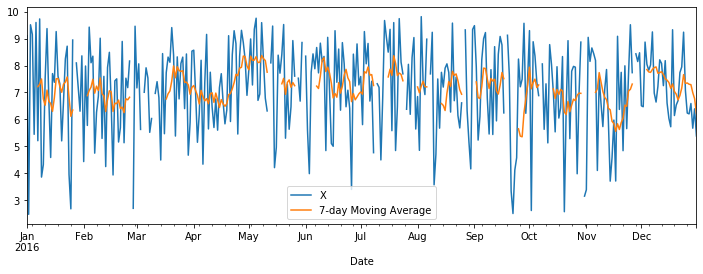

In [45]:
df[['X', '7-day Moving Average']].plot(figsize=(12,4))

### Frequency Plot (Histogram)

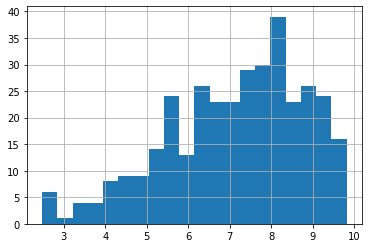

In [46]:
df.X.hist(bins=20)

### Add a Calculated Column

In [47]:
df['y'] = 125 + 2.5*x + 5.0*np.random.randn(n)
df.head()

,X,7-day Moving Average,y
Date,,,
2016-01-01,9.103938,NaN,140.842581
2016-01-02,2.481612,NaN,130.491185
2016-01-03,9.510878,NaN,159.491001
2016-01-04,9.152343,NaN,147.068108
2016-01-05,5.447742,NaN,141.105792


### Plots with Secondary Axes

In [48]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.


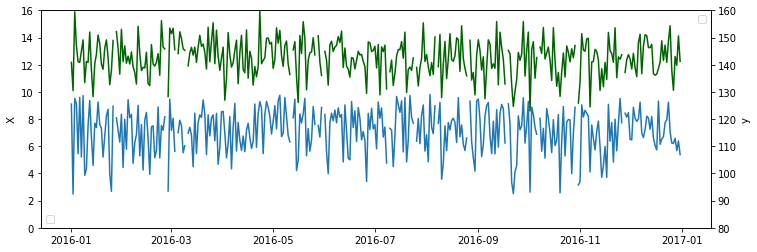

In [49]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['X'])
ax.set_ylim((0, 16))
ax.set_ylabel('X')
ax.legend(loc=3)

ax2 = ax.twinx()
ax2.plot(df['y'], color='darkgreen')
ax2.set_ylim((80, 160))
ax2.set_ylabel('y')
ax2.legend(loc=1)

plt.show()

### Scatter Plot

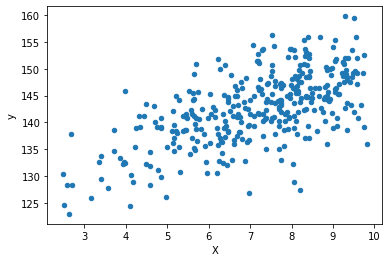

In [50]:
df.plot('X', 'y', kind='scatter', style='.')

### Save a Plot as an Image File

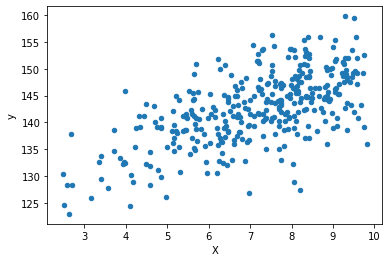

In [51]:
df.plot('X', 'y', kind='scatter', style='.')
plt.savefig("scatter.pdf")  # other options include png, jpg, etc.

### Correllation matrix

In [52]:
df.corr()

,X,7-day Moving Average,y
X,1.000000,0.366506,0.622212
7-day Moving Average,0.366506,1.000000,0.214670
y,0.622212,0.214670,1.000000


### Create a Cumulative Function

In [53]:
df['y cum'] = df.y.cumsum()

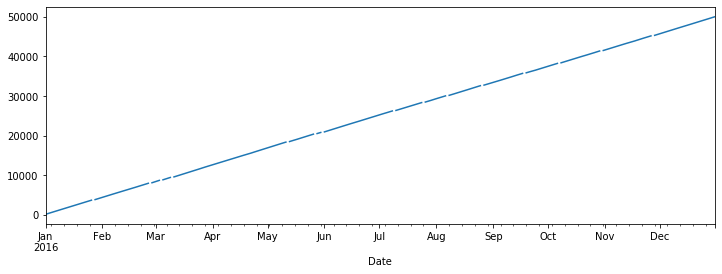

In [54]:
df['y cum'].plot(figsize=(12,4))

### Add a Categoy Column

In [55]:
df['Day of Week'] = time_series.dayofweek
df.head()

,X,7-day Moving Average,y,y cum,Day of Week
Date,,,,,
2016-01-01,9.103938,NaN,140.842581,140.842581,4
2016-01-02,2.481612,NaN,130.491185,271.333766,5
2016-01-03,9.510878,NaN,159.491001,430.824767,6
2016-01-04,9.152343,NaN,147.068108,577.892875,0
2016-01-05,5.447742,NaN,141.105792,718.998667,1


### Calculating Average/Sum/Count by category (`groupby`)

In [56]:
df.groupby('Day of Week').X.mean()

Day of Week
0    6.995117
1    7.008496
2    7.326841
3    6.796261
4    7.617166
5    7.242989
6    6.919308
Name: X, dtype: float64

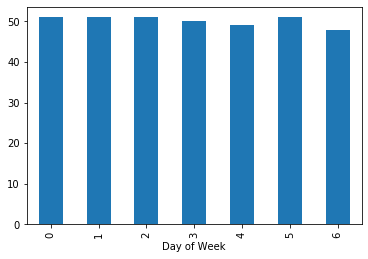

In [57]:
df.groupby('Day of Week').X.count().plot(kind='bar')

### Frequency Plot (Histogram) - with control of bins

In [58]:
bins = np.linspace(0, 10, 6)
bins

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [59]:
bin_labels = pd.Series(["< {:.0f}".format(i) for i in bins] + [">= {:.0f}".format(bins[-1])])
bin_labels

0      < 0
1      < 2
2      < 4
3      < 6
4      < 8
5     < 10
6    >= 10
dtype: object

In [60]:
np.digitize(x, bins)[0:10]

array([5, 2, 5, 5, 3, 5, 3, 5, 2, 3])

In [61]:
bin_counts = df.groupby(np.digitize(x, bins)).X.count()
bin_counts

2     18
3     68
4    139
5    126
6      0
Name: X, dtype: int64

In [62]:
hist_df = pd.DataFrame(data={"Category": bin_labels, "Count": bin_counts})
hist_df.set_index("Category", inplace=True)
hist_df

,Count
Category,
< 0,NaN
< 2,NaN
< 4,18.0
< 6,68.0
< 8,139.0
< 10,126.0
>= 10,0.0


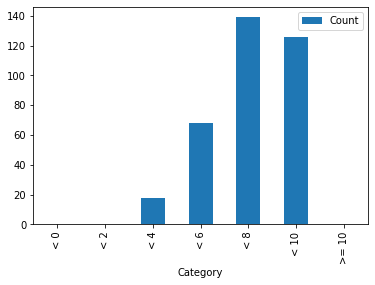

In [63]:
hist_df.plot(kind='bar')

### Drop Missing Values

In [64]:
df.isnull().sum()

X                        15
7-day Moving Average    106
y                        15
y cum                    15
Day of Week               0
dtype: int64

In [65]:
# You have to remove any data with missing values
# before trying to do linear regression etc.

df_no_missing = df.dropna()
df_no_missing.describe()

,X,7-day Moving Average,y,y cum,Day of Week
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,7.184280,7.161991,142.693301,25622.830640,3.003846
std,1.546838,0.577646,6.463791,14671.897766,1.983519
min,2.577688,5.356345,122.987880,1004.717541,0.000000
25%,6.213954,6.800921,138.636119,13449.855463,1.000000
50%,7.381474,7.172025,142.534638,24891.434873,3.000000
75%,8.333236,7.542669,147.199611,38509.975919,5.000000
max,9.811717,8.370838,159.757530,50061.803547,6.000000


### Linear Regression

In [66]:
from scipy import stats

In [67]:
X, y = df_no_missing['X'], df_no_missing['y']

In [68]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [70]:
print(slope, intercept, r_value, p_value, std_err)

2.3824927991292895 125.57680568494037 0.570150097258646 8.139553628778109e-24 0.21372805945300455


In [71]:
df['Prediction'] = intercept + df['X']*slope
df['Residual'] = df['y'] - df['Prediction']

In [72]:
x_range = np.linspace(df['X'].min(), df['X'].max(), 2)
y_best_fit = x_range*slope + intercept

In [73]:
zip(x_range, y_best_fit)

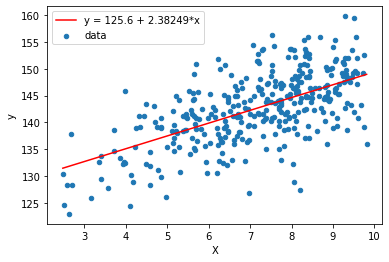

In [74]:
fig, ax = plt.subplots()
df.plot('X', 'y', ax=ax, kind='scatter')

ax.plot(x_range, y_best_fit, color='r')

equation = "y = {:.1f} + {:.5f}*x".format(intercept, slope)

ax.legend([equation, 'data'])
plt.show()

### More Sophisticated Model Fitting with `scikit-learn`

In [75]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [76]:
# You have to re-shape the arrays for scikit-learn
X, y = df_no_missing['X'].values.reshape(-1, 1), df_no_missing['y'].values.reshape(-1, 1)

X.shape, y.shape

((260, 1), (260, 1))

In [77]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
regr = linear_model.LinearRegression(fit_intercept=True)

In [79]:
# Train/fit the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
regr.score(X_test, y_test)

0.3320724027990575

In [81]:
# The results are returned as arrays (for multi-dimensional data)
# but the example here is 1-dimensional so we just take the first element
slope, intercept = regr.coef_[0, 0], regr.intercept_[0]
slope, intercept

(2.35785110900737, 125.87529908503276)

### Applying Function Calculations to Data

In [82]:
df['log X'] = df['X'].apply(np.log)

In [83]:
df.head()

,X,7-day Moving Average,y,y cum,Day of Week,Prediction,Residual,log X
Date,,,,,,,,
2016-01-01,9.103938,NaN,140.842581,140.842581,4,147.266873,-6.424291,2.208707
2016-01-02,2.481612,NaN,130.491185,271.333766,5,131.489228,-0.998044,0.908908
2016-01-03,9.510878,NaN,159.491001,430.824767,6,148.236404,11.254596,2.252436
2016-01-04,9.152343,NaN,147.068108,577.892875,0,147.382196,-0.314088,2.214010
2016-01-05,5.447742,NaN,141.105792,718.998667,1,138.556011,2.549781,1.695201


### Applying a Custom Function

In [84]:
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df['Weekday Name'] = df['Day of Week'].apply(lambda day: days_of_week[day])

In [85]:
df.head()

,X,7-day Moving Average,y,y cum,Day of Week,Prediction,Residual,log X,Weekday Name
Date,,,,,,,,,
2016-01-01,9.103938,NaN,140.842581,140.842581,4,147.266873,-6.424291,2.208707,Fri
2016-01-02,2.481612,NaN,130.491185,271.333766,5,131.489228,-0.998044,0.908908,Sat
2016-01-03,9.510878,NaN,159.491001,430.824767,6,148.236404,11.254596,2.252436,Sun
2016-01-04,9.152343,NaN,147.068108,577.892875,0,147.382196,-0.314088,2.214010,Mon
2016-01-05,5.447742,NaN,141.105792,718.998667,1,138.556011,2.549781,1.695201,Tue


In [86]:
df.loc[df['Weekday Name'] == 'Mon', 'y'].head()

Date
2016-01-04    147.068108
2016-01-11    140.803735
2016-01-18    147.765839
2016-01-25    137.817261
2016-02-01    141.118754
Freq: 7D, Name: y, dtype: float64